# Deep Learning Frameworks

## Comparison

<img src="imgs/frameworks.png">

more details at http://www.slideshare.net/xavigiro/deep-learning-for-computer-vision-software-frameworks-upc-2016

## We start from theano

Theano features:

- integration with NumPy
- effective analytical computation of gradient (can automatically build expressions to compute gradient)
- fast and stable optimization (can recognize numerical inaccurate expressions and compute them using more stable algorithms)
- transparent usage of GPU
- dynamic C++ code generation


<small>more details at http://theano.readthedocs.io/en/latest/</small>

<center><img  src="imgs/import_theano.jpg"/></center>
<small>courtesy of http://www.marekrei.com/blog/theano-tutorial/</small>

## Installation

#### prerequisites
- If you want fast compiled code (recommended), make sure you have g++ (Windows/Linux) or Clang (OS X) installed.
- miniconda
- `conda install numpy scipy mkl <nose> <sphinx> <pydot-ng>`
- see link below for GPU installation details

#### theano itself
- ```pip install Theano[test, doc]```
- install `libgpuarray`, http://bit.ly/2eeynjd


<small>more details http://theano.readthedocs.io/en/latest/install_macos.html</small>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
from __future__ import print_function
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,roc_curve
from sklearn.metrics import roc_auc_score

/root/miniconda/envs/rep_py2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Import theano and naming conventions

In [2]:
import theano.tensor as T
import theano

## Symbolic expessions for tensors
Theano’s strength is in expressing symbolic calculations involving tensors. There are many types of symbolic expressions for tensors:

* scalar
* vector
* matrix
* tensor
* ...

## Exercise: warming up
* Implement a function that takes 1 argument - N and computes the sum of squares of numbers from 0 to N
* An array of numbers 0 to N returned by `np.arange(N)`

function definition should look like

```(python)
def sum_squares(N):
    array = ...
    sum = ...
    return sum
```

In [3]:
def sum_squares(N):
    return np.sum(np.arange(N)**2)

In [4]:
# implement function sum_squares(N) here:

In [5]:
%%time
sum_squares(10**8)

CPU times: user 434 ms, sys: 586 ms, total: 1.02 s
Wall time: 1.07 s


662921401752298880

## theano teaser

Doing the very same thing

In [6]:
import theano
import theano.tensor as T

In [7]:
#I gonna be function parameter
N = T.scalar("a dimension",dtype='int32')


#i am a recipe on how to produce sum of squares of arange of N given N
result = (T.arange(N)**2).sum()

#Compiling the recipe of computing "result" given N
sum_function = theano.function(inputs = [N],outputs=result)

In [8]:
%%time
sum_function(10**8)

CPU times: user 400 ms, sys: 342 ms, total: 742 ms
Wall time: 807 ms


array(662921401752298880)

## How does it work?

__if you're currently in classroom, chances are I am explaining this text wall right now__

* 1 You define inputs of your future function;
* 2 You write a recipe for some transformation of inputs;
* 3 You compile it;
* You have just got a function!
* The gobbledegooky version: _you define a function as symbolic computation graph_.

* There are two main kinds of entities: "Inputs" and "Transformations"
* Both can be numbers, vectors, matrices, tensors, etc.
* Both can be integers, floats of booleans (uint8) of various size.

* An input is a placeholder for function parameters.
 * N from example above

* Transformations are the recipes for computing something given inputs and transformation
 * (T.arange(N)^2).sum() are 3 sequential transformations of N
 * Mimics all functions of numpy vector syntax
 * You can almost always go with replacing "np.function" with "T.function" aka "theano.tensor.function"
   * np.mean -> T.mean
   * np.arange -> T.arange
   * np.cumsum -> T.cumsum
   * and so on.
   * builtin operations also work that way
   * np.arange(10).mean() -> T.arange(10).mean()
   * Once upon a blue moon the functions have different names or locations (e.g. T.extra_ops)
     * Ask us or google it
 
Still confused? We gonna fix that.

In [9]:
#Inputs
example_input_integer = T.scalar("scalar input",dtype='float32')

example_input_tensor = T.tensor4("four dimensional tensor input") # don't be afraid, we won't use it

input_vector = T.vector("", dtype='int32') # vector of integers

In [10]:
#Transformations

#transofrmation: elementwise multiplication
double_the_vector = input_vector*2

#elementwise cosine
elementwise_cosine = T.cos(input_vector)

#difference between squared vector and vector itself
vector_squares = input_vector**2 - input_vector


## Exercise: define two float32 vectors

```python
my_vector = ...
my_vector2 = ...
```

In [11]:
#Practice time:
#create two vectors of size float32
my_vector = T.vector('float32')
my_vector2 = T.vector('float32')

In [12]:
# put your vector definition here

## Exercise: define transformation

it should compute (my_vector)*(my_vector2) / (sin(my_vector) +1)
```python
my_transformation = 
```

In [13]:
my_transformation = my_vector * my_vector2 / (T.sin(my_vector) + 1)

In [14]:
#Write a transformation:


In [15]:
print (my_transformation)
#it's okay it aint a number

Elemwise{true_div,no_inplace}.0


## Exercise: compiling
* So far we were using "symbolic" variables and transformations
 * Defining the recipe for computation, but not computing anything
* To use the recipe, one should compile it

```python
my_function = ...
```

In [16]:
inputs = [my_vector, my_vector2]
outputs = [my_transformation]

# The next lines compile a function that takes two vectors and computes your transformation
my_function = theano.function(
    inputs,outputs,
    allow_input_downcast=True #automatic type casting for input parameters (e.g. float64 -> float32)
 )

In [17]:
# define compiled function here

In [18]:
#using function with, lists:
print ("using python lists:")
print (my_function([1,2,3],[4,5,6]))
print

#Or using numpy arrays:
#btw, that 'float' dtype is casted to secong parameter dtype which is float32
print ("using numpy arrays:")
print (my_function(np.arange(10),
                  np.linspace(5,6,10,dtype='float')))


using python lists:
[array([  2.1721765 ,   5.23752866,  15.77397633])]
using numpy arrays:
[array([   0.        ,    2.77555886,    5.47030772,   14.0213123 ,
         89.54770241,  676.25775443,   47.18391794,   24.40843183,
         23.68156223,   38.24041719])]


## Debugging
* Compilation can take a while for big functions
* To avoid waiting, one can evaluate transformations without compiling
* Without compilation, the code runs slower, so consider reducing input size


In [19]:
#a dictionary of inputs
my_function_inputs = {
    my_vector:[1,2,3],
    my_vector2:[4,5,6]
}

# evaluate my_transformation
# has to match with compiled function output
print (my_transformation.eval(my_function_inputs))


# can compute transformations on the fly
print ("add 2 vectors", (my_vector + my_vector2).eval(my_function_inputs))

#!WARNING! if your transformation only depends on some inputs,
#do not provide the rest of them
print ("vector's shape:", my_vector.shape.eval({
        my_vector:[1,2,3]
    }))


[  2.1721765    5.23752866  15.77397633]
add 2 vectors [ 5.  7.  9.]
vector's shape: [3]


* When debugging, one would generally want to reduce the computation complexity. For example, if you are about to feed neural network with 1000 samples batch, consider taking first 2.
* If you really want to debug graph of high computation complexity, you could just as well compile it (e.g. with optimizer='fast_compile')

### `theano.printing.pprint()`
Theano provides the functions `theano.printing.pprint()` and `theano.printing.debugprint()` to print a graph to the terminal before or after compilation. `pprint()` is more compact and math-like, `debugprint()` is more verbose. Theano also provides `pydotprint()` that creates an image of the function. 

In [20]:
theano.pprint(my_vector)

'float32'

In [21]:
theano.printing.debugprint(my_function)

Elemwise{Composite{((i0 * i1) / (i2 + sin(i0)))}} [id A] ''   0
 |float32 [id B]
 |float32 [id C]
 |TensorConstant{(1,) of 1.0} [id D]


The output file is available at graph.png


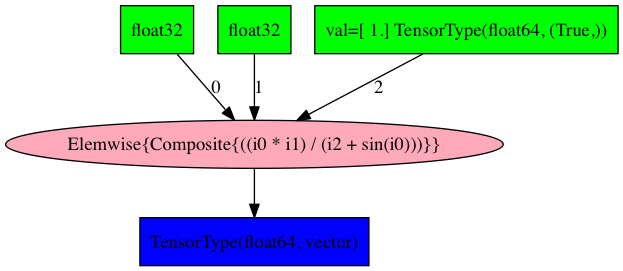

In [22]:
theano.printing.pydotprint(my_function, outfile="graph.png", var_with_name_simple=True)
Image('./graph.png')

## Exercises

In [23]:
# Let's define two vector and two scalar placeholders
x = T.vector() 
y = T.vector()
alpha = T.scalar()
beta = T.scalar()

# define values for each placeholder 
x_val = np.arange(10)
y_val = np.arange(10)
alpha_val = 0.1
beta_val = 0.3

* compute $z = (x_1 + y_1^2, x_2 + y_2^2, ...)^T$: define theano function and evaluate it

* compute $||\textbf{x}||$

* compute $(\textbf{x} \cdot \alpha \textbf{y} + \beta \textbf{x} \cdot \textbf{y})^2$

# Shared variables

* The inputs and transformations only exist when function is called

* Shared variables always stay in memory like global variables
 * Shared variables can be included into a symbolic graph
 * They can be set and evaluated using special methods
   * but they can't change value arbitrarily during symbolic graph computation
   * we'll cover that later;
 
 
* Hint: such variables are a perfect place to store network parameters
 * e.g. weights or some metadata

In [24]:
#creating shared variable
shared_vector = theano.shared(np.ones(10,dtype='float64'))

In [25]:

#evaluating shared variable (outside symbolicd graph)
print ("initial value",shared_vector.get_value())

# within symbolic graph you use them just as any other inout or transformation, not "get value" needed

initial value [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [26]:
#setting new value
shared_vector.set_value( np.arange(5) )

#getting that new value
print ("new value", shared_vector.get_value())

#Note that the vector changed shape
#This is entirely allowed... unless your graph is hard-wired to work with some fixed shape

new value [ 0.  1.  2.  3.  4.]


## Exercise: define another shared vector and assign it to `shared_vector`

```python
shared_vector2 = ...
```

In [27]:
shared_vector2 = theano.shared(shared_vector.eval())

In [28]:
# put your code here

In [29]:
print (shared_vector2.eval())

[ 0.  1.  2.  3.  4.]


## Almost done - Updates

* updates are a way of changing shared variables at after function call.

* technically it's a dictionary {shared_variable : a recipe for new value} which is has to be provided when function is compiled

That's how it works:

In [30]:
# Multiply shared vector by a number and save the product back into shared vector
input_scalar = T.scalar()
scalar_times_shared = input_scalar * shared_vector

inputs = [input_scalar]
outputs = [scalar_times_shared] #return vector times scalar

my_updates = [
    (shared_vector, scalar_times_shared) #and write this same result bach into shared_vector
]

compute_and_save = theano.function(inputs, outputs, updates=my_updates)

In [31]:
shared_vector.set_value(np.arange(5))

#initial shared_vector
print ("initial shared value:" ,shared_vector.get_value())

# evaluating the function (shared_vector will be changed)
print ("compute_and_save(2) returns",compute_and_save(2))

#evaluate new shared_vector_1
print ("new shared value:" ,shared_vector.get_value())



initial shared value: [ 0.  1.  2.  3.  4.]
compute_and_save(2) returns [array([ 0.,  2.,  4.,  6.,  8.])]
new shared value: [ 0.  2.  4.  6.  8.]


## Gradient, T.grad - why theano matters
* Theano can compute derivatives and gradients automatically
* Derivatives are computed symbolically, not numerically

Limitations:
* You can only compute a gradient of a __scalar__ transformation over one or several scalar or vector (or tensor) transformations or inputs.
* A transformation has to have float32 or float64 dtype throughout the whole computation graph
 * derivative over an integer has no mathematical sense


### 1D gradient (derivative)

In [32]:
x = T.scalar(name='x') 
function1d = x ** 2 + T.log(x)
function1d_derivative = T.grad(function1d, x)

In [33]:
# let's compile it
compiled_derivative = theano.function([x], outputs=[function1d_derivative])
compiled_f = theano.function([x], function1d)

In [34]:
# optimizations were done during compilation
theano.printing.debugprint(compiled_derivative)

Elemwise{Composite{((i0 * i1) + inv(i1))}} [id A] ''   0
 |TensorConstant{2.0} [id B]
 |x [id C]


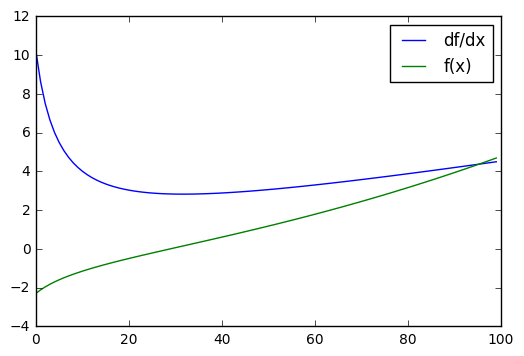

In [35]:
xarray = np.linspace(0.1, 2, 100)
plt.plot([compiled_derivative(point) for point in xarray], label="df/dx")
plt.plot([compiled_f(point) for point in xarray], label="f(x)")
_ = plt.legend()

Or you can compute gradient wrt set of variables

In [36]:
b = theano.shared(6.0)
x = T.scalar(dtype='float64')
function1d = x ** 2 + T.log(x) + b
function1d_derivative = T.grad(function1d, [x, b])
compiled_derivative = theano.function([x], function1d_derivative)
compiled_f = theano.function([x], function1d)



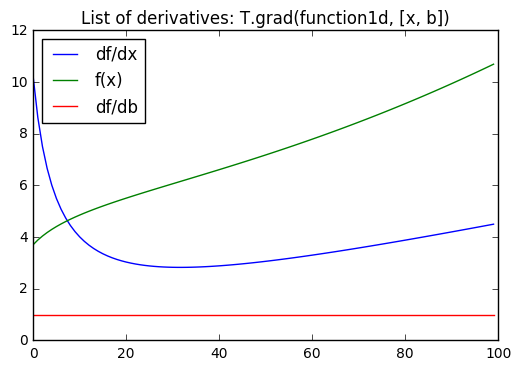

In [37]:
xarray = np.linspace(0.1, 2, 100)
plt.plot([compiled_derivative(point)[0] for point in xarray], label="df/dx")
plt.plot([compiled_f(point) for point in xarray], label="f(x)")
plt.plot([compiled_derivative(point)[1] for point in xarray], label="df/db")

plt.title("List of derivatives: T.grad(function1d, [x, b])")
_ = plt.legend(loc="upper left")

### NDimensional gradient

In [38]:
x = T.vector(name='x') 
function = T.sum(x * x)
function_gradient = T.grad(function, x)

In [39]:
compiled_gradient = theano.function([x], function_gradient)

In [40]:
compiled_gradient([1, 2, 4, 0])

array([ 2.,  4.,  8.,  0.])

In [41]:
theano.printing.debugprint(compiled_gradient)

Elemwise{add,no_inplace} [id A] ''   0
 |x [id B]
 |x [id B]


## Why that rocks

In [42]:
my_vector = T.vector('float64')
my_scalar = T.scalar('float64')

#Compute the gradient of the next weird function over my_scalar and my_vector
#warning! Trying to understand the meaning of that function may result in permanent brain damage

weird_psychotic_function = ((my_vector+my_scalar)**(1+T.var(my_vector)) +1./T.arcsinh(my_scalar)).mean()/(my_scalar**2 +1) + 0.01*T.sin(2*my_scalar**1.5)*(T.sum(my_vector)* my_scalar**2)*T.exp((my_scalar-4)**2)/(1+T.exp((my_scalar-4)**2))*(1.-(T.exp(-(my_scalar-4)**2))/(1+T.exp(-(my_scalar-4)**2)))**2

## Define gradient of the function

```python
der_by_scalar, der_by_vector = ...
```

In [43]:
der_by_scalar, der_by_vector = T.grad(weird_psychotic_function, [my_scalar, my_vector])

In [44]:
# define gradient by scalar and by vector here

In [45]:
compute_weird_function = theano.function([my_scalar,my_vector],weird_psychotic_function)
compute_der_by_scalar = theano.function([my_scalar,my_vector],der_by_scalar)

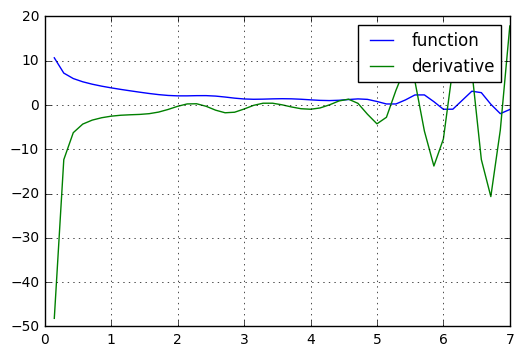

In [46]:
#Plotting your derivative
vector_0 = [1,2,3]

scalar_space = np.linspace(0,7)

y = [compute_weird_function(x,vector_0) for x in scalar_space]
plt.plot(scalar_space,y,label='function')
y_der_by_scalar = [compute_der_by_scalar(x,vector_0) for x in scalar_space]
plt.plot(scalar_space,y_der_by_scalar,label='derivative')
plt.grid();plt.legend()


## Matrix

#### Compute $||A\textbf{x}||^2$:

In [47]:
x = T.vector('x')
A = T.matrix('A')
z = A.dot(x)
normAx = theano.function([x, A], z.dot(z))
normAx([0, 2], [[1, 1], [1, 1]])

array(8.0)

## Exercises

* compile a function which takes an array $x$ with three elements and computes $x_0^3 + \sin{x_1}*\cos{x_2}$. Check it by computing at any point

* compute gradient for previous function w.r.t. x

* compute gradient for $||A\textbf{x}|| + \alpha * ||\textbf{x}||$ 

## Logistic regression 

In [48]:
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_digits

## Logistic regression description:

### $p_i = \sigma(\sum_k X_{ik} w_k + b_0)$

### $\text{logLikelihood}=\sum_i y_i \log{p_i} + \sum_i (1-y_i)\log{(1 - p_i)}\qquad y \in \{0, 1\}$

### $loss = -\text{logLikelihood}, \qquad loss \to \min$



## Exercise 

Let's build logistic regression to discriminate 0 from 1 on MNIST dataset

Write loss function and its gradient using theano (create compiled expressions).

Implement the regular logistic regression training algorithm (weights -= 0.01 * grad)

Tips:
* Weights fit in as a shared variable
* X and y are inputs
* Compile 2 functions:
 * train_function(X,y) - returns error and computes weights' new values __(through updates)__
 * predict_fun(X) - just computes probabilities ("y") given data
* output labels - {0, 1}
* while computing log() beware of log(0) (by adding very small epsilon value)
* You can **use** `T.nnet.sigmoid`

In [8]:
import pandas as pd

In [13]:
pd.read_csv?

Загрузим данные

In [164]:
mnist = pd.read_csv("data_bank-marketing", skiprows = 97, header = None)
mnist.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,1


Последняя колонка является целевым признаком, принимающим почему-то значения 1 или 2, изменим их на 0 и 1 соответственно. Заметим, что большинство признаков категориальные, исправим их, используя dummy-кодирование. Признак "месяц" лучше объединить с признаком "день", получив тем самым новый признак "день с начала года". *а лучше вообще их удалить для начала* Выполним эти 3 преобразования:

In [165]:
y = mnist[16]
y = np.array(y)
y = y - 1
del mnist[16]
X = mnist.copy()

In [37]:
#pd.Categorical.from_array(X[10]).codes

array([6, 5, 0, 4, 5, 2, 5, 5, 5, 0, 5, 0, 1, 0, 3], dtype=int8)

In [32]:
#X[10] = X[10].astype('category')
#X['c'] = pd.Categorical.from_array(X[10]).codes

/root/miniconda/envs/rep_py2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/root/miniconda/envs/rep_py2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [166]:
del X[9]
del X[10]
cat_columns = X.select_dtypes(include=['object']).columns
cont_columns = X.select_dtypes(exclude=['object']).columns
data_cat = X.select_dtypes(include=['object'])

In [167]:
unique_threshold = 20
for column in cat_columns:
    if len(X[column].unique()) > unique_threshold:
        X = X.drop(column, 1)
        continue
    dummies = pd.get_dummies(X[column])
    #print(column,dummies.columns)
    dummies.columns = [str(column) + '_' + d_c for d_c in dummies.columns]
    X[dummies.columns] = dummies
    X = X.drop(column, 1)

Так теперь выглядят данные:

In [168]:
print(X.shape)
X.head()

(4521, 38)


,0,5,11,12,13,14,1_admin.,1_blue-collar,1_entrepreneur,1_housemaid,...,6_yes,7_no,7_yes,8_cellular,8_telephone,8_unknown,15_failure,15_other,15_success,15_unknown
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,33,4789,220,1,339,4,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0
2,35,1350,185,1,330,1,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
3,30,1476,199,4,-1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,59,0,226,1,-1,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1


## Define variables for logistic regression

```python
shared_weights = # shared vector of weights, dimension = number of input variables (features)
shared_bias = # shared bias scalar
input_X = # matrix of digits vs features
input_y = # vector of labels
```

In [131]:
# inputs and shared variable, try initializing with 0s, 1s and np.random.rand
shared_weights = theano.shared(np.zeros(X.shape[1]))
shared_bias = theano.shared(0.0)
input_X = T.matrix('float64')
input_y = T.vector('float64')

In [53]:
# put your code here

Let's define expressions for predicted values and loss function

```python
predicted_y = # prediction of p_i
eps =  # very small value, to avoid log(0)
log_likelihood = # logistic likelihood (use eps to avoid log(0))
loss = # -log_likelihood
```

In [132]:
predicted_y = T.nnet.sigmoid(input_X.dot(shared_weights) + shared_bias)
eps =  1e-7
log_likelihood = T.sum(T.log(predicted_y + eps) * input_y) + T.sum((1 - input_y) * T.log(1 - predicted_y + eps))
loss = -log_likelihood

In [55]:
# put your code here

Define gradient and update of shared weights 

```python
der_weights, der_bias = # write gradient wrt shared_weights, shared_bias

shared_updates = [
    ... # update weights and bias
]
```

In [133]:
der_weights, der_bias = T.grad(loss, [shared_weights, shared_bias])

alpha = 0.01
shared_updates = [
    (shared_bias, shared_bias - alpha * der_bias ),
    (shared_weights, shared_weights - alpha * der_weights)
]

In [57]:
# put your code here

Now we have expessions for loss and its gradient and we need to use some optimization method

```
predict_function = #<compile function that takes X and computes probabilities of y>
train_function = #<compile function that takes X and y, returns log loss and updates weights>
```

In [134]:
predict_function = theano.function([input_X], predicted_y)
train_function = theano.function([input_X, input_y], loss, updates=shared_updates)

In [114]:
print ("Weights: ", shared_weights.eval(), "\nBias: ", shared_bias.eval())
print ("Predictions:", predict_function(X_test)[:20])

Weights:  [  6.25476144e+02   1.00972323e+04   5.01588189e+03   4.08355875e+01
   6.43176178e+02   9.52022677e+00   1.66244234e+00   2.97192700e+00
   5.23440269e-01   3.56812718e-01   3.32368166e+00   9.45146316e-01
   6.31991844e-01   1.39235481e+00   3.58086362e-01   2.44799411e+00
   3.93499958e-01   1.26662547e-01   1.89912826e+00   9.05112411e+00
   4.18052853e+00   2.11168236e+00   7.95596358e+00   4.51292426e+00
   5.50947800e-01   1.47335711e+01   3.96080655e-01   6.94953131e+00
   8.18026495e+00   1.28891868e+01   2.24186399e+00   1.02251599e+01
   1.08043655e+00   3.82400938e+00   1.55524737e+00   7.20533077e-01
   8.82041177e-01   1.19738751e+01] 
Bias:  15.1298401067
Predictions: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


In [103]:
assert len(predict_function(X_test)[:20]) == 20

loss at iter 0:4859.7118
train auc: 0.489947188955
test auc: 0.483796942237
loss at iter 1:2496845081.8739
train auc: 0.489947188955
test auc: 0.483796942237
loss at iter 2:2496845081.8739
train auc: 0.489947188955
test auc: 0.483796942237
loss at iter 3:2496845081.8739
train auc: 0.489947188955
test auc: 0.483796942237
loss at iter 4:2496845081.8739
train auc: 0.489947188955
test auc: 0.483796942237


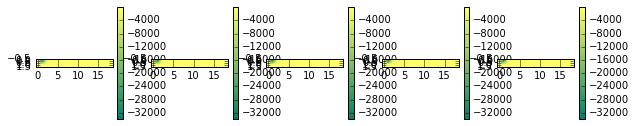

In [144]:
shared_weights.set_value(0.001*np.random.rand(shared_weights.eval().shape[0]))
shared_bias.set_value(0.01*np.random.rand())

plt.figure(figsize=(10,2))
for i in range(5):
    loss_i = train_function(X_train,y_train)
    print ("loss at iter %i:%.4f"%(i, loss_i))
    print ("train auc:",roc_auc_score(y_train, predict_function(X_train)))
    print ("test auc:",roc_auc_score(y_test, predict_function(X_test)))
    plt.subplot(1, 5, i+1)
    plt.imshow(shared_weights.eval().reshape(2,-1), cmap=plt.cm.summer)
    plt.colorbar();

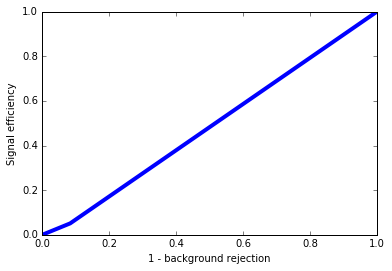

In [140]:
# It's time to plot ROC curve
y_pred = predict_function(X_test)

plt.plot(*roc_curve(y_test,y_pred)[:2], lw=4)
plt.xlabel("1 - background rejection")
plt.ylabel("Signal efficiency")

Домашка-8: разбиение с помощью Kfold  и зависимость результата от числа итераций обучения:

In [188]:
X.shape[0]

4521

In [157]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.17.1.


In [189]:
NF = 10
from sklearn.cross_validation import KFold
kf = KFold(4000,n_folds=NF)


In [196]:
X = pd.DataFrame.as_matrix(X)
X.shape

(4521, 38)

In [207]:
def iteration(n):
    err = 0
    for train_index, test_index in kf:
        #print("TRAIN:", train_index, "TEST:", test_index)
        for i in range(n):
            losses = train_function(X[train_index],y[train_index])
            #print(losses)
        #print (X[test_index].shape)
        predictions = predict_function(X[test_index])
        err = err + sum(y[test_index] - predictions) / predictions.shape[0]
    err = err / NF
    return err

In [208]:
results = np.zeros(20)
for i in range(results.shape[0]):
    results[i] = iteration(i)

In [209]:
results

array([ 0.04125,  0.04125,  0.04125,  0.04125,  0.04125,  0.04125,
        0.04125,  0.04125,  0.04125,  0.04125,  0.04125,  0.04125,
        0.04125,  0.04125,  0.04125,  0.04125,  0.04125,  0.04125,
        0.04125,  0.04125])

In [212]:
%ls

0-Setup.ipynb                                 7-References.ipynb
1-DL-intro-preamble.ipynb                     Dockerfile
2-Theano.ipynb                                README.md
3-Keras basics.ipynb                          data_bank-marketing
4-Keras-Higgs.ipynb                           imgs/
5-Keras-CNN.ipynb                             marketing-randomForest.ipynb
6-Unsupervised Learning - AutoEncoding.ipynb  sol.ipynb
